In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [136]:
df= pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')

In [137]:
df.drop(["Unnamed: 0"], axis=1,inplace=True)

In [138]:
numerical = df.select_dtypes(int)

In [139]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [140]:
categoricals = df.select_dtypes(object)


## Activity 6

### One Hot/Label Encoding of the categorical variables in the categoricals data frame

In [141]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   effective_to_date  10689 non-null  object
 5   month              10689 non-null  object
 6   employment_status  10689 non-null  object
 7   gender             10689 non-null  object
 8   location_code      10689 non-null  object
 9   marital_status     10689 non-null  object
 10  policy_type        10689 non-null  object
 11  policy             10689 non-null  object
 12  renew_offer_type   10689 non-null  object
 13  sales_channel      10689 non-null  object
 14  vehicle_class      10689 non-null  object
 15  vehicle_size       10689 non-null  object
dtypes: object(16)
memory usage: 1.3+ MB


I am goind to delete "effective_to_date" because it doesn't make sense to make dummies from every date. In addition we already have a "Month" column.

In [142]:
categoricals.drop(["effective_to_date"],axis=1,inplace=True)

/home/dani/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [143]:
categoricals

,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


#### Which one are ordinals? 
As we have some columns with an order, we want to change it manually

In [144]:
categoricals.coverage.unique()

array(['basic', 'extended', 'premium'], dtype=object)

In [145]:
categoricals["coverage"]  = categoricals["coverage"].replace({'basic': '0', 'extended': '1', 'premium': '2'})

<ipython-input-145-e1d9039445fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals["coverage"]  = categoricals["coverage"].replace({'basic': '0', 'extended': '1', 'premium': '2'})


In [146]:
categoricals.education.unique()

array(['college', 'bachelor', 'high school or below', 'doctor', 'master'],
      dtype=object)

In [147]:
categoricals["education"]  = categoricals["education"].replace({'high school or below': '0', 'college': '1', 'bachelor': '2', 'master': '3', 'doctor': '4'})

<ipython-input-147-b3e6e3c73703>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals["education"]  = categoricals["education"].replace({'high school or below': '0', 'college': '1', 'bachelor': '2', 'master': '3', 'doctor': '4'})


In [148]:
categoricals.month.unique()

array(['feb', 'jan'], dtype=object)

In [149]:
categoricals["month"]  = categoricals["month"].replace({'jan': '0', 'feb': '1'})

<ipython-input-149-817c78909473>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals["month"]  = categoricals["month"].replace({'jan': '0', 'feb': '1'})


In [150]:
categoricals.vehicle_size.unique()

array(['medsize', 'small', 'large'], dtype=object)

In [151]:
categoricals["vehicle_size"]  = categoricals["vehicle_size"].replace({'small': '0', 'medsize': '1','large': '2' })

<ipython-input-151-8b0165ea3450>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals["vehicle_size"]  = categoricals["vehicle_size"].replace({'small': '0', 'medsize': '1','large': '2' })


In [84]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   month              10689 non-null  object
 5   employment_status  10689 non-null  object
 6   gender             10689 non-null  object
 7   location_code      10689 non-null  object
 8   marital_status     10689 non-null  object
 9   policy_type        10689 non-null  object
 10  policy             10689 non-null  object
 11  renew_offer_type   10689 non-null  object
 12  sales_channel      10689 non-null  object
 13  vehicle_class      10689 non-null  object
 14  vehicle_size       10689 non-null  object
dtypes: object(15)
memory usage: 1.2+ MB


#### Which one are nominals? 

Just use get dummies, as we don't need an order

In [85]:
categoricals = pd.get_dummies(data=categoricals, columns=['region', 'response','employment_status','gender','location_code','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class'], drop_first=True)

### check if there are highly correlated features and drop them if there are any.

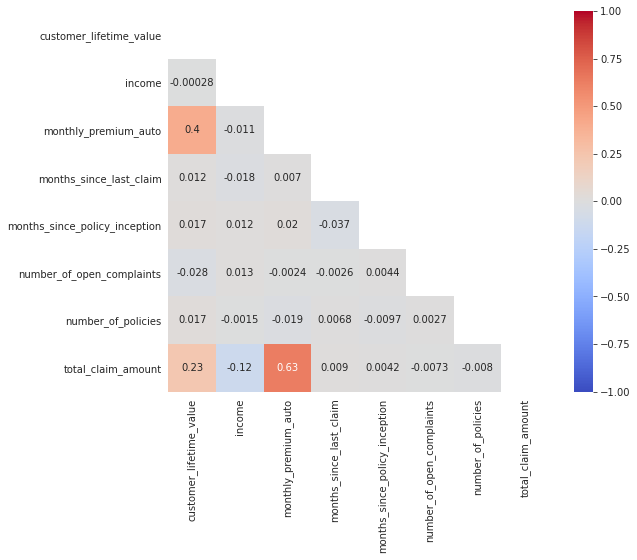

In [86]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### X-y split (y is the target variable which is the total claim amount)

In [87]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [88]:
categoricals

,coverage,education,month,vehicle_size,region_east,region_north west,region_west region,response_yes,employment_status_employed,employment_status_medical leave,...,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,0,1,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,2,1,1,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
3,1,1,0,1,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2,2,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2,2,0,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
10685,0,1,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
10686,1,2,1,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
10687,2,1,1,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [89]:
df = pd.concat([numerical, categoricals], axis=1)
df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,coverage,education,...,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,4809,48029,61,7,52,0,9,292,0,1,...,1,0,0,0,0,0,0,0,0,0
1,2228,26794,64,3,26,0,1,744,0,1,...,0,1,0,1,0,0,0,0,0,0
2,14947,22139,100,34,31,0,2,480,0,2,...,1,0,0,1,0,0,0,0,1,0
3,22332,49078,97,10,3,0,2,484,1,1,...,0,0,1,0,0,0,0,0,0,0
4,9025,23675,117,15,31,1,7,707,2,2,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214,2,2,...,1,0,0,0,1,1,0,0,0,0
10685,5259,61146,65,7,68,0,6,273,0,1,...,0,0,1,0,0,0,0,0,0,0
10686,23893,39837,201,11,63,0,2,381,1,2,...,0,0,0,0,1,0,1,0,0,0
10687,11971,64195,158,0,27,4,6,618,2,1,...,0,0,1,0,0,0,0,0,1,0


In [90]:
df["coverage"] = df["coverage"].astype(int)
df["education"] = df["education"].astype(int)
df["month"] = df["month"].astype(int)
df["vehicle_size"] = df["vehicle_size"].astype(int)

### REMOVE OUTLIERS

I decide to remove outliers on columns 1,3,8, where there are a lot.

In [91]:
from scipy.stats import scoreatpercentile as pct
from scipy.stats import iqr
def remove_outliers(df):
    pct_75 = pct(df, 75)  # Calculate percentile 75 using scipy function scoreatpercentile
    pct_25 = pct(df, 25)  # Calculate percentile 25 using scipy function scoreatpercentile
    upper_bound = pct_75 + 1.5*iqr(df)  # iqr - > Scipy function to calculate the Interquartile Range
    lower_bound = pct_25 - 1.5*iqr(df)
    df = df[(df <= upper_bound) & (df >= lower_bound)]  # Filter out the outliers
    return df

In [92]:
df['customer_lifetime_value'] = remove_outliers(df['customer_lifetime_value'])
df['monthly_premium_auto'] = remove_outliers(df['monthly_premium_auto'])
df['total_claim_amount'] = remove_outliers(df['total_claim_amount'])

In [93]:
len(df)

10689

In [94]:
df = df.dropna()

In [95]:
len(df)

9171

<b>Data Splitting: for now we are going tp use only numerical

In [96]:
X = df.drop("total_claim_amount", axis=1)
y = df["total_claim_amount"]

## Activity 7

In [97]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

### ALL THE TRANSFORMATIONS HAS TO BEEN DONE AFTER THE SPLITTING AND APPLIED TO A NEW X_TRAIN CALLED X_TRAIN_SCALED OR X_TRAIN_TRANSFORMATION OR WHATEVER

<b>First transformation: Standarize the data

In [98]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [99]:
X_train_scaled

array([[ 0.38525127,  0.60739036, -1.12553919, ..., -0.22640904,
        -0.46569522,  1.86364448],
       [-0.98735573, -1.22149137, -0.2628722 , ..., -0.22640904,
        -0.46569522, -0.53658303],
       [-1.12891193, -0.68015066, -0.94392509, ..., -0.22640904,
        -0.46569522,  1.86364448],
       ...,
       [ 1.30520384,  1.16378491,  0.28197011, ..., -0.22640904,
        -0.46569522,  1.86364448],
       [ 0.55056287,  0.51113343,  0.46358422, ..., -0.22640904,
        -0.46569522, -0.53658303],
       [ 1.56651333,  0.5457015 ,  2.1889182 , ..., -0.22640904,
         2.14732717, -0.53658303]])

In [100]:
X_train_scaled.shape

(6419, 45)

In [101]:
X_test_scaled=std_scaler.transform(X_test)

<b>Second transformation: Power transformer to get a normal distribution

/home/dani/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>,
        <AxesSubplot:title={'center':'number_of_policies'}>],
       [<AxesSubplot:title={'center':'coverage'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'vehicle_size'}>,
        <AxesSubplot:title={'center':'region_east'}>,
        <AxesSubplot:title={'center':'region_north west'}>,
        <AxesSubplot:title={'center':'region_west region'}>],
       [<AxesSubplot:title={'center':'response_yes'}>,
        <AxesSubplot:title={'center':'employment_status_employed'}>,
        <AxesSubplot:title={'center':'employment

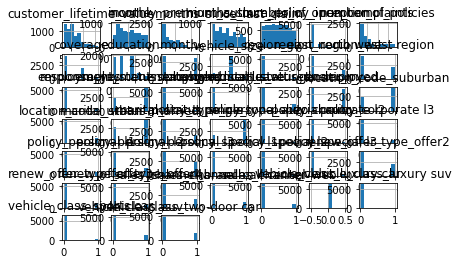

In [102]:
X_train.hist()

In [103]:
power=PowerTransformer().fit(X_train_scaled)   ##. finding the parameters ( mean, variance from the training set )

/home/dani/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [104]:
power= PowerTransformer()
power.fit(X_train_scaled)
X_train_trans = power.transform(X_train_scaled)
X_test_trans = power.transform(X_test_scaled)


/home/dani/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [105]:
# We should check is now looks normal distributed

<b> Apply linear regression

In [106]:
model=LinearRegression()    # model
model.fit(X_train_trans, y_train)   # model train

LinearRegression()

<b> model parameters  (b1,b2,b3,b4,b5,b6,b7)

In [107]:
model.coef_

array([ 2.08010550e+00, -3.35799228e+00,  7.59327071e+01,  2.79478857e-01,
       -3.85178357e-01, -1.85307332e+00, -1.94788897e+00,  4.32703423e+00,
       -3.64507317e+00, -3.40602111e-02, -3.57180529e+00,  4.28553048e+00,
       -1.63209070e+00,  1.71693332e-01, -5.57885664e+00, -1.51633873e+00,
        9.95657739e-01,  1.91998573e+00,  2.41435379e+01,  3.08866505e+00,
        1.73157495e+02,  8.13861886e+01, -9.49293212e-02,  1.91807308e+01,
        1.81722124e+13, -2.29311661e+14, -3.50462324e+00, -2.38670809e+00,
       -1.43404779e+13, -1.75641114e+13, -2.00024506e+13,  1.00956549e+14,
        1.54776508e+14,  1.40768105e+14,  3.08334552e+00,  1.39305644e+00,
        3.45384737e+00,  1.60233829e+00,  8.66767575e-02,  1.54260057e+00,
        0.00000000e+00, -5.70996553e-01,  7.44075285e+00,  1.21117899e+01,
        1.51045825e+00])

In [108]:
model.intercept_

381.51797229198365

<b> Making predictions

We make predictions (y_pred) using X_test_scaled

In [109]:
y_pred=model.predict(X_test_trans)   # model prediction

y_pred_train=model.predict(X_train_trans)

In [110]:
y_pred.shape

(2752,)

In [111]:
y_pred_train.shape

(6419,)

In [112]:
y.shape

(9171,)

### Model evaluation

In [113]:
y_test

8320     305.0
2773       7.0
4031      75.0
4696     117.0
10646     14.0
         ...  
10446    547.0
3867     806.0
9440     547.0
7136     246.0
9369     491.0
Name: total_claim_amount, Length: 2752, dtype: float64

In [114]:
y_pred.shape   #same shape as y_test

(2752,)

In [115]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
8320,305.0,247.175115
2773,7.0,129.512622
4031,75.0,266.794469
4696,117.0,185.447413
10646,14.0,20.187382
...,...,...
10446,547.0,565.706365
3867,806.0,662.956733
9440,547.0,587.132407
7136,246.0,218.327230


### Analizing the model. What kind of plot you will get if all the all the predictions are ok? A stright line

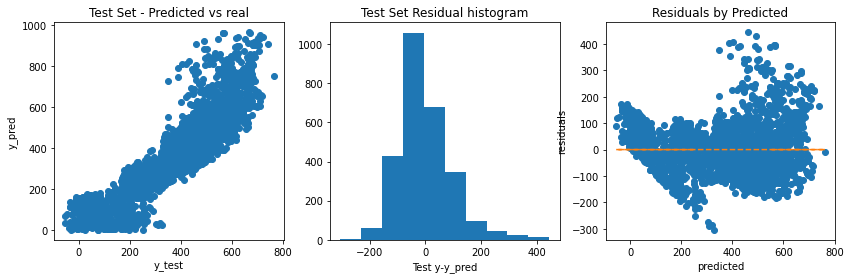

In [116]:
# Make an scatter plot y_pred vs y

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [117]:
# first plot: checking linearity
# second plot: checking normality of residuals. It is a normal distribution, and the majority of residuals are close to 0. good! 
# --> No over or under estimation
# third plot: checking homoscedasticity. Variance is less constant than in the previos model

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

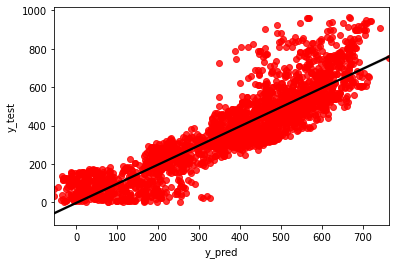

In [118]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

### Model evaluation

In [ ]:
print ("MSE is " + str(mse(y_test,y_pred)))
print ("RMSE is " + str(mse(y_test,y_pred,squared=False)))
print ("Mean absolute error - MAE - is " + str(mae(y_test,y_pred)))

- r2

In [123]:
R2 = r2_score(y_test,y_pred)
R2

0.7809383490898261

- Adjusted r2

In [124]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.7772954169793465

### Evaluate error metrics also on train test

- If error_train very high -> Underfitting ( consider other model or to  add more variables)
- If error_train <= error_test -> Ok
- If error_train very small and <<<< error_test -> Overfitting!!!! ( you overtrained your model  or you did not applied the transformer to the test set ).


In [125]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)

In [134]:
round(R2_test,4), round(R2_train,4)  #OK

(0.7837, 0.7834)

### Feature importance
- In order to check which independent features are more relevant to your model, compare the absolute value of each coefficient.

In [127]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [128]:
features_importances

,Attribute,Importance
25,policy_type_special auto,2.293117e+14
32,policy_special l2,1.547765e+14
33,policy_special l3,1.407681e+14
31,policy_special l1,1.009565e+14
30,policy_personal l3,2.000245e+13
24,policy_type_personal auto,1.817221e+13
29,policy_personal l2,1.756411e+13
28,policy_personal l1,1.434048e+13
20,location_code_suburban,1.731575e+02
21,location_code_urban,8.138619e+01


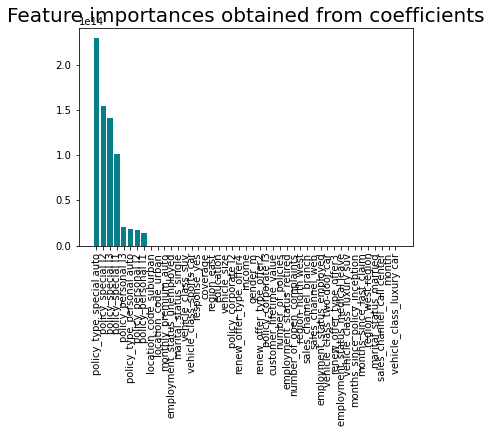

In [129]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

/home/dani/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

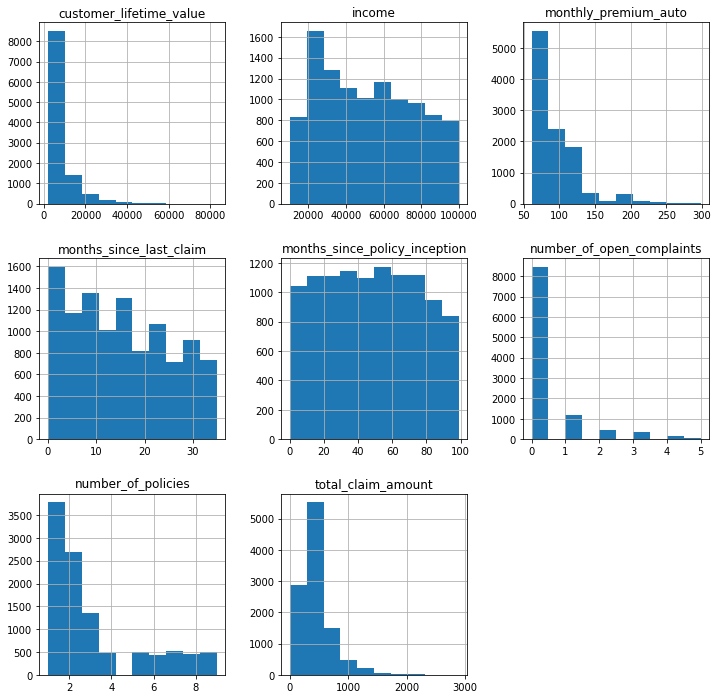

In [130]:
numerical.hist(figsize=(12,12))

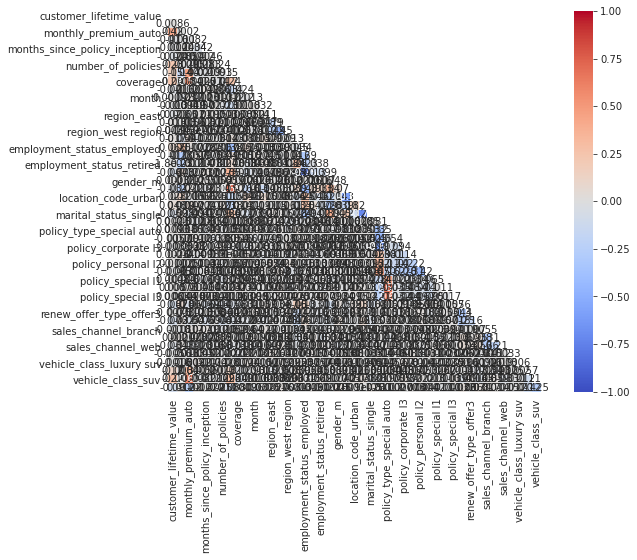

In [131]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [132]:
corr = df.corr()
corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,coverage,education,...,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
customer_lifetime_value,1.000000,0.008631,0.421024,-0.016327,-0.012386,-0.024259,0.226531,0.151703,0.234234,-0.021360,...,-0.007512,-0.073021,-0.001837,0.010071,-0.033613,-0.005615,-0.001592,0.122161,0.267000,-0.090280
income,0.008631,1.000000,-0.000196,-0.011455,0.013658,0.008473,-0.002897,-0.144381,-0.000836,0.016061,...,0.003035,0.022440,-0.010299,0.020932,0.013443,-0.001332,-0.003149,-0.008427,-0.001131,0.011949
monthly_premium_auto,0.421024,-0.000196,1.000000,-0.008177,0.003415,-0.013921,-0.014662,0.440828,0.545661,-0.020730,...,-0.011591,-0.054456,0.016791,-0.002757,-0.031018,-0.013243,-0.009007,0.305364,0.620335,-0.221141
months_since_last_claim,-0.016327,-0.011455,-0.008177,1.000000,-0.041996,0.001189,0.002760,-0.020335,-0.002473,-0.000418,...,-0.013265,-0.007734,0.017122,0.002724,-0.023061,0.004545,0.022409,0.000558,-0.008201,0.011678
months_since_policy_inception,-0.012386,0.013658,0.003415,-0.041996,1.000000,0.004564,-0.013270,-0.018909,0.007663,0.018745,...,0.005477,-0.068836,0.018597,-0.027848,-0.001624,-0.012373,-0.000739,0.020375,-0.012281,-0.002217
number_of_open_complaints,-0.024259,0.008473,-0.013921,0.001189,0.004564,1.000000,0.002385,-0.009266,-0.014268,0.008581,...,-0.008376,-0.007439,-0.012164,-0.008311,-0.008634,0.000205,-0.010837,-0.006989,-0.012371,-0.002470
number_of_policies,0.226531,-0.002897,-0.014662,0.002760,-0.013270,0.002385,1.000000,-0.015107,-0.016635,-0.012741,...,0.006384,-0.080764,-0.015952,0.009185,0.008708,-0.011880,0.002802,0.012568,-0.009273,-0.011268
total_claim_amount,0.151703,-0.144381,0.440828,-0.020335,-0.018909,-0.009266,-0.015107,1.000000,0.244071,-0.141997,...,-0.019800,-0.039955,0.005241,-0.000124,-0.018048,-0.002174,-0.001731,0.120520,0.281193,-0.087608
coverage,0.234234,-0.000836,0.545661,-0.002473,0.007663,-0.014268,-0.016635,0.244071,1.000000,-0.024376,...,0.000662,-0.022078,0.009410,-0.015035,-0.018347,-0.016539,-0.011296,-0.019515,-0.049484,-0.001171
education,-0.021360,0.016061,-0.020730,-0.000418,0.018745,0.008581,-0.012741,-0.141997,-0.024376,1.000000,...,0.013436,-0.023966,0.006375,0.010478,-0.004029,0.002100,0.024386,-0.009281,-0.010199,0.009566
